In [19]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
import os
from glob import glob
import pyvips
# from PIL import Image
# from openslide import open_slide
# from openslide.deepzoom import DeepZoomGenerator
# import openslide
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from skimage import data, color
from skimage import filters
from skimage import exposure
from skimage.exposure.exposure import histogram
import numpy as np 
import matplotlib.colors

In [2]:
import girder_client
import numpy as np
from skimage.transform import resize
from matplotlib import pylab as plt
from matplotlib.colors import ListedColormap
from histomicstk.preprocessing.color_normalization import reinhard
from histomicstk.saliency.tissue_detection import (
    get_slide_thumbnail, get_tissue_mask)
from histomicstk.annotations_and_masks.annotation_and_mask_utils import (
    get_image_from_htk_response)
from histomicstk.preprocessing.color_normalization.\
    deconvolution_based_normalization import deconvolution_based_normalization
from histomicstk.preprocessing.color_deconvolution.\
    color_deconvolution import color_deconvolution_routine, stain_unmixing_routine
from histomicstk.preprocessing.augmentation.\
    color_augmentation import rgb_perturb_stain_concentration, perturb_stain_concentration

In [3]:
tile_folder = r"/home/student/MSI_remote_dev/microsatellite-instability-classification/data/test_full_tiles/d2f7c2cc-a0e7-4392-8199-3f5032bc7af6"
processed_tile_folder = r"/home/student/MSI_remote_dev/microsatellite-instability-classification/data/test_full_processed_tiles/d2f7c2cc-a0e7-4392-8199-3f5032bc7af6"

In [4]:
tiles_paths = glob(f"{tile_folder}/**/*.jpg", recursive=True)
processed_tiles_paths = glob(f"{processed_tile_folder}/**/*.jpg", recursive=True)
len(tiles_paths), len(processed_tiles_paths)

(3072, 3072)

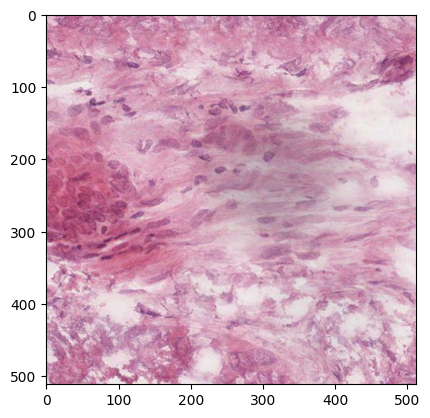

In [17]:
row, col = (10, 40)
test_img = pyvips.Image.new_from_file(os.path.join(tile_folder, '0', f'{col}_{row}.jpg'))
plt.imshow(test_img)

In [18]:
path = None
for proc_tile_path in processed_tiles_paths:
    if os.path.basename(proc_tile_path).startswith(f'{col}_{row}'):
        path = proc_tile_path
        break
path

'/home/student/MSI_remote_dev/microsatellite-instability-classification/data/test_full_processed_tiles/d2f7c2cc-a0e7-4392-8199-3f5032bc7af6/40_10_BG_N.jpg'

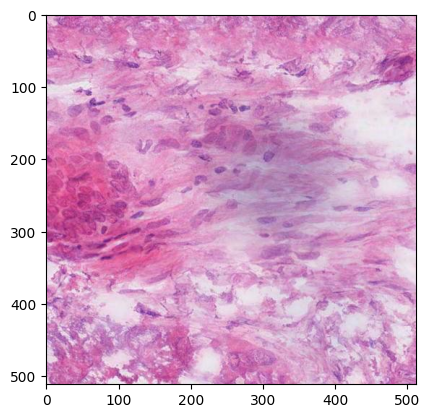

In [21]:
tile = pyvips.Image.new_from_file(path).numpy()
plt.imshow(tile)

In [25]:
threshold = 0.3
bw_img = (color.rgb2gray(tile)*255)
filtered_pixels = (bw_img < 192).sum()
r = filtered_pixels / bw_img.size
if r < threshold: # classified as background
    print("Filtered")
r , filtered_pixels, bw_img.size

(0.7843284606933594, 205607, 262144)

In [ ]:
def filter_otsu(tile, threshold, suffix, **kwargs):
    bw_img = (color.rgb2gray(tile.img)*255)
    filtered_pixels = (bw_img < tile.get('otsu_val')).sum()
    r = filtered_pixels / tile.size
    if r < threshold: # classified as background
        tile.add_filename_suffix(suffix)
    return tile